![A soccer pitch for an international match.](soccer-pitch.jpg)

You're working as a sports journalist at a major online sports media company, specializing in soccer analysis and reporting. You've been watching both men's and women's international soccer matches for a number of years, and your gut instinct tells you that more goals are scored in women's international football matches than men's. This would make an interesting investigative article that your subscribers are bound to love, but you'll need to perform a valid statistical hypothesis test to be sure!

While scoping this project, you acknowledge that the sport has changed a lot over the years, and performances likely vary a lot depending on the tournament, so you decide to limit the data used in the analysis to only official `FIFA World Cup` matches (not including qualifiers) since `2002-01-01`.

You create two datasets containing the results of every official men's and women's international football match since the 19th century, which you scraped from a reliable online source. This data is stored in two CSV files: `women_results.csv` and `men_results.csv`.

The question you are trying to determine the answer to is:

> Are more goals scored in women's international soccer matches than men's?

You assume a **10% significance level**, and use the following null and alternative hypotheses:

$H_0$ : The mean number of goals scored in women's international soccer matches is the same as men's.

$H_A$ : The mean number of goals scored in women's international soccer matches is greater than men's.

In [44]:
# Start your code here!
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from scipy.stats import ttest_ind
import pingouin

In [5]:
# loading data
women = pd.read_csv('women_results.csv', index_col=0)
men = pd.read_csv('men_results.csv', index_col=0)

In [6]:
# explore men data
men.sample(10)

,date,home_team,away_team,home_score,away_score,tournament
12629,1982-08-09,Malaysia,Pakistan,4,1,Friendly
23729,2000-10-15,Lebanon,Iraq,2,2,AFC Asian Cup
26098,2003-07-04,Guernsey,Isle of Man,3,1,Island Games
1662,1934-03-25,Bulgaria,Hungary,1,4,FIFA World Cup qualification
41885,2019-11-14,Qatar,Singapore,2,0,Friendly
373,1913-08-31,Argentina,Uruguay,2,0,Copa Premio Honor Argentino
41655,2019-09-22,Zimbabwe,Lesotho,3,1,African Nations Championship qualification
11533,1980-05-31,Australia,England,1,2,Friendly
30898,2008-08-20,Canada,Jamaica,1,1,FIFA World Cup qualification
13111,1983-10-22,Tanzania,Malawi,1,1,Friendly


In [7]:
# explore men data
women.sample(10)

,date,home_team,away_team,home_score,away_score,tournament
812,1996-05-25,France,Russia,0,1,UEFA Euro qualification
3047,2012-09-19,Armenia,Czech Republic,0,2,UEFA Euro qualification
1979,2006-09-06,Jamaica,Bermuda,7,0,CONCACAF Gold Cup
766,1996-03-11,Portugal,Russia,1,2,Algarve Cup
3346,2014-10-27,Tonga,Cook Islands,1,1,OFC Championship
505,1993-08-08,United States,Canada,1,0,CONCACAF Invitational Tournament
233,1987-11-15,Germany,Italy,3,0,UEFA Euro qualification
3718,2016-08-09,Germany,Canada,1,2,Olympic Games
3350,2014-12-11,China PR,United States,1,1,Friendly
1739,2004-07-25,Cameroon,Congo,0,0,African Championship qualification


In [20]:
# what kind of tournament do we have?
women['tournament'][women['tournament'].str.contains('fifa', case=False)].value_counts()

tournament
FIFA World Cup                  284
FIFA World Cup qualification    172
Name: count, dtype: int64

In [19]:
men['tournament'][men['tournament'].str.contains('fifa', case=False)].value_counts()

tournament
FIFA World Cup qualification    7878
FIFA World Cup                   964
FIFA 75th Anniversary Cup          1
Name: count, dtype: int64

In [32]:
# Selectiing relevant data
women_clean = women[(women['tournament'] == 'FIFA World Cup') & (women['date'] >= '2002-01-01')].copy()
men_clean = men[(men['tournament'] == 'FIFA World Cup') & (men['date'] >= '2002-01-01')].copy()



# joining data
women_clean['type'] = 'F'
men_clean['type'] = 'M'
data = pd.concat([women_clean, men_clean])

data['total'] = data['home_score'] + data['away_score']


In [33]:
data.groupby('type')['total'].mean()

type
F    2.980000
M    2.513021
Name: total, dtype: float64

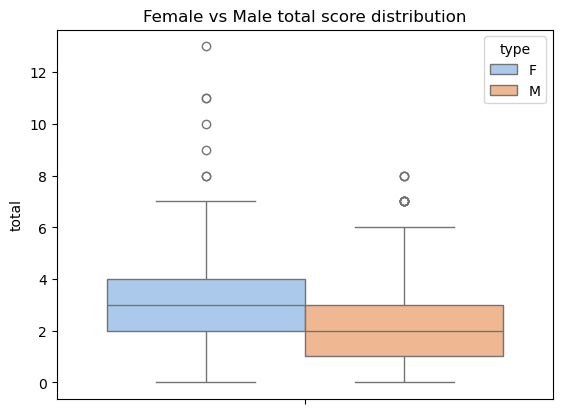

In [39]:
sns.boxplot(
    data=data,
    hue='type',
    y='total',
    palette='pastel'
)

plt.title('Female vs Male total score distribution')

plt.show()

<Axes: xlabel='total', ylabel='Count'>

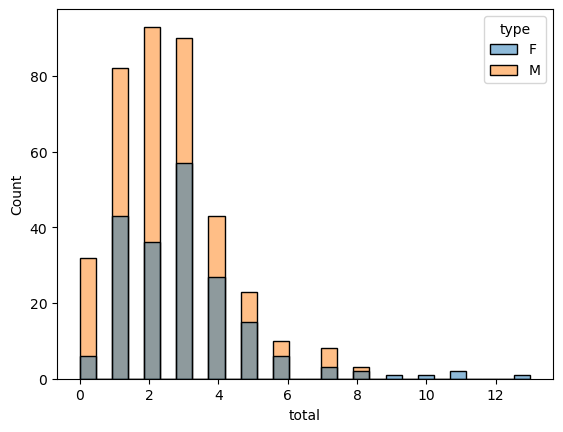

In [43]:
sns.histplot(
    data=data,
    x='total',
    hue='type'
)

In [46]:
stats = pingouin.mwu(
    x=data[data['type'] == 'F']['total'],
    y=data[data['type'] == 'M']['total'],
    alternative='greater'
)

In [50]:
p_val = stats['p-val'].iloc[0]
print(p_val)

0.005106609825443641


In [54]:
alpha = 0.1
if p_val < alpha:
    result = "reject"
else:
    result = "fail to reject"

result_dict = {"p_val": p_val, "result": result}
print(result_dict) 

{'p_val': 0.005106609825443641, 'result': 'reject'}
